# Data Wrangling

In [16]:
%matplotlib inline

# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [17]:
# Determine current working directory

import os

currentPath = os.getcwd()
currentPath

'/Users/Younes/Desktop/ML_testing/Final_Project'

In [37]:
# Load file (White wine)

df_wine_w = pd.read_csv("winequality-white.csv")
df_wine_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
# Clean data

df_wine_w = df_wine_w.dropna()
df_wine_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
# Data type

df_wine_w.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [40]:
# Shape

df_wine_w.shape

(4898, 12)

In [22]:
# dimension datset

df_wine_w.ndim

2

In [23]:
# number of unique values in each column

df_wine_w.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [24]:
# Columns

df_wine_w.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
df_wine_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Data Exploration

In [79]:
# Determine x and y variable

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol'] 

x = df_wine_w[features]
y = df_wine_w.quality

In [80]:
# Shape

print("Shape: ", x.shape, y.shape)

Shape:  (4898, 11) (4898,)


In [81]:
# Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [87]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,quality
2762,5
42,6
1419,7
3664,8
2125,5
...,...
934,5
2803,8
3364,6
3870,6


In [89]:
# Create a model and fit it

Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
# Determine R-square for test data

r_sq = Model.score(x_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.24815662587817136


In [91]:
# Intercept 

print('intercept:', Model.intercept_)

intercept: 200.28325184176742


In [92]:
# Slope 

print('slope:', Model.coef_)

slope: [ 1.15989956e-01 -1.80466188e+00 -1.50084077e-02  9.67717990e-02
 -4.22336380e-01  5.11799045e-03 -2.40509546e-04 -2.01070812e+02
  8.69262672e-01  6.58085048e-01  1.28438281e-01]


In [93]:
# Make prediction

y_pred = Model.predict(x_test)
print('predicted response:', y_pred)

predicted response: [5.57971783 5.45994641 6.08955775 ... 6.37422419 6.02965649 6.01060053]


In [94]:
# Actual vs Predicted

df_pred = pd.DataFrame({'Actual': (y_test), 'Predicted': (y_pred)})
df_pred

,Actual,Predicted
2762,5,5.579718
42,6,5.459946
1419,7,6.089558
3664,8,6.818900
2125,5,5.977221
...,...,...
934,5,5.516126
2803,8,6.667610
3364,6,6.374224
3870,6,6.029656


In [106]:
# Mean Squared Error

plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
r2 = Model.score(x_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6080380633630996, R2: 0.24815662587817136


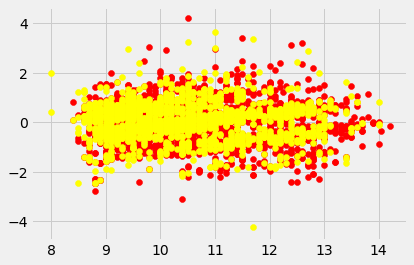

In [107]:
# Plotting alcohol vs quality

y_train_df = pd.DataFrame(x_train)
y_train_df['alcohol']

y_test_df = pd.DataFrame(x_test)
y_test_df['alcohol']

plt.scatter(y_train_df['alcohol'], Model.predict(x_train) - y_train, c="Red", label="Training Data")
plt.scatter(y_test_df['alcohol'], Model.predict(x_test) - y_test, c="yellow", label="Testing Data")

In [102]:
# Add column

Outcome = '0'
df_wine_w["Outcome"] = Outcome
df_wine_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Outcome
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [30]:
# Save dataframe to csv.

df_wine_w.to_csv('/Users/Younes/Desktop/ML_testing/Final_Project/df_final_w.csv', index=False)